<a href="https://colab.research.google.com/github/ignyz/Numerical-methods-and-algorithms/blob/main/L3_2_b_Interpoliavimas_globaliu_splainu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

F [[-4.69930000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.55290000e+00  3.14640000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 3.55634000e+00  5.10924000e+00  9.81420000e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 8.82652000e+00  5.27018000e+00  8.04700000e-02 -3.00316667e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.29486000e+01  4.12208000e+00 -5.74050000e-01 -2.18173333e-01
   2.05358333e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 

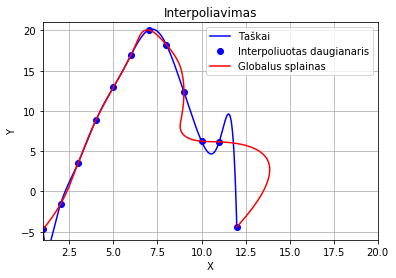

In [ ]:
#!/usr/bin/env python

import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
import time
import sympy as sym
from numpy import *
from matplotlib.pyplot import *
from scipy import interpolate

def Apsk(a, x, r):
    x.astype(float)
    n = len(a) - 1
    fff = a[n]
    for i in range(n - 1, -1, -1):
        fff = fff * (r - x[i]) + a[i]
    return fff


def calculateDistance(x1, y1, x2, y2):
    dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return dist


xmin = 1.
xmax = 12.
N = 12
n = N-1
deltax = calculateDistance(xmin, 0, xmax, 0) / (N-1)

X=zeros(N)
Y=zeros(N)
Y = np.array([    [-4.6993],    [-1.5529],    [3.55634],    [8.82652],    [12.9486],    [16.9681],    
                  [20.0556],    [18.2434],    [12.343],    [6.23618],    [6.16597],    [-4.406]])

X = np.array([    [1],    [2],    [3],    [4],    [5],    [6],
                  [7],    [8],    [9],    [10],    [11],    [12]])
######### Niutono išraiška interpoliuojančiam daugianariui apskaičiuoti

F=zeros((N,N), dtype=float)
for i in range(0,N):
  F[i,0]=Y[i]

for j in range(1,N):
  for i in range(j,N):
    F[i,j] = float(float(F[i,j-1]-F[i-1,j-1]) / float(X[i]-X[i-j]))
print("F",F)
b=zeros(N, dtype=float)
for i in range(0,N):
  b[i] = F[i,i]


#print("B",b)
# Y=zeros(N)

xnow = xmin


############ GRAFIKU PAISYMAS ##########
t = linspace(1, 12, 500)
#y1 = zeros(len(t))


y1 = zeros(len(t))
for i in range(len(t)):
    y1[i] = Apsk(b, X, t[i])


plot(t, y1, 'b-')
xlabel('X')
ylabel('Y')
legend(['Duota funkcija exp(-x^3)*cos(x^2)*(x-3)', 'Interpoliavimas per tolygiai pasiskyrsciusius taskus',
        'Interpoliavimas per Čiobyševo abscisės taškus'])
title('Plotting two curves in the same plot')
################################
A=zeros((N,N), dtype=float)

for dd in range(N):
  i=0
#  if dd==0:
##   A[dd,dd] = 1
###   A[dd,dd+1] = 1

## elif dd==N-1:
##  A[dd,dd-3]=1
###  A[dd,dd-2]=1
#  else :
#    A[dd,dd-1]=1
##   A[dd,dd-2]=1
#    A[dd,dd-3]=1

print(A)





################################
x = reshape(X,12,1)
y = reshape(Y,12,1)

tck, u = interpolate.splprep([x,y], k =2, s=0)
u=np.linspace(0, 1, num=200, endpoint=True)
#print(tck)
out = interpolate.splev(u, tck)
#https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
#plt.figure()
plot(x, y, 'bo', out[0], out[1], 'r')
plt.legend([ 'Taškai','Interpoliuotas daugianaris', 'Globalus splainas'],loc='best')
plt.axis([1, 20, -6, 21])
#plt.axis([1, 13, -6, 21])

plt.title('Interpoliavimas')
plt.grid(True)
plt.aa = True
show()


[array([0.        , 0.        , 0.        , 0.        , 0.16563144,
       0.27006455, 0.35264291, 0.43328187, 0.49646498, 0.53676083,
       0.65327073, 0.77374469, 1.        , 1.        , 1.        ,
       1.        ]), [array([ 1.        ,  2.06198399,  2.80840282,  3.86100502,  4.99843464,
        5.92438549,  6.69459956,  8.81039985,  9.40491538,  7.19224946,
       24.60788408, 12.        ]), array([-4.6993    , -2.06199963,  2.56854539,  8.40143112, 13.12039169,
       15.99585676, 21.39066901, 16.39949334, 13.18081952,  0.65577222,
       13.81347941, -4.406     ])], 3]


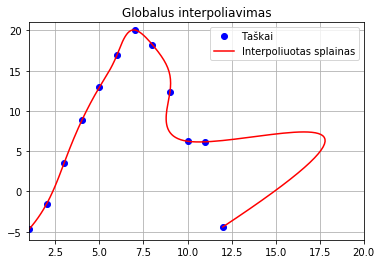

In [ ]:
#!/usr/bin/env python

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import math
from scipy import interpolate

  # Find the B-spline representation of an N-dimensional curve.
  #
  # PARAMS
  # k - Degree of the spline. Cubic splines are recommended.
  # Even values of k should be avoided especially with
  # a small s-value. 1 <= k <= 5, default is 3.
  #
  # s - A smoothing condition.
  #
  # RETURN
  # u - An array of the values of the parameter.
  #
  # tck - knots, coefficients, and degree of the spline.
  #


  # Evaluate a B-spline or its derivatives.
  # Given the knots and coefficients of a B-spline representation, evaluate the
  # value of thesmoothing polynomial and its derivatives. This is a wrapper
  # around the FORTRAN routines splev and splder of FITPACK.
  #
  # PARAMS
  # u - A 1-D array of points at which to return the value of the smoothed 
  # spline or its derivatives. If tck was returned from splprep, then the 
  # parameter values, u should be given.
  #
  # tck - A sequence of length 3 returned by splrep or splprep containing the
  # knots, coefficients, and degree of the spline.
  # 
  # RETURN
  # out - An array of values representing the spline function evaluated at
  # the points in x. If tck was returned from splprep, then this is a list
  # of arrays representing the curve in N-dimensional space.
  #
Y = np.array([    [-4.6993],    [-1.5529],    [3.55634],    [8.82652],    [12.9486],    [16.9681],    
                [20.0556],    [18.2434],    [12.343],    [6.23618],    [6.16597],    [-4.406]])

X = np.array([    [1],    [2],    [3],    [4],    [5],    [6],
                [7],    [8],    [9],    [10],    [11],    [12]])
x = reshape(X,12,1)
y = reshape(Y,12,1)
tck, u = interpolate.splprep([x,y], s=0)
u=np.linspace(0, 1, num=200, endpoint=True)
print(tck)
out = interpolate.splev(u, tck)
#https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
plt.figure()
plt.plot(x, y, 'bo', out[0], out[1], 'r')
plt.legend(['Taškai', 'Interpoliuotas splainas', 'True'],loc='best')
plt.axis([1, 20, -6, 21])
plt.title('Globalus interpoliavimas')
plt.grid(True)
plt.aa = True
show()